In [1]:
from Modules.GeSbS import *
from Modules.GeSbS_Graphics import *

Creo un objeto que contenga la información basica del dispositivo:

In [2]:
GeSbS_Obj = GeSbS(N = 4096,T_window = 100 * (10 ** -12))

Aplico sobre el objeto un pulso de caracter Gaussiano:

In [3]:
Gaussian_beam = GeSbS_Obj.Gaussian(power = 20, lambda_0 = 1550 * (10 ** -9), FWHM = 1000 * (10 ** -9), width = 5.72 * (10 ** -9))

Hallamos el campo de salida del material:

In [4]:
# betas
betas = np.array([-6.99 * (10 ** -25), -7.27929 * (10 ** -39)])

Output = GeSbS_Obj.Output_field(input_field = Gaussian_beam, device_length = 13 * (10 ** -3), betas = betas, A_eff = .42 * (10 ** -12), n2 = 10 * (10 ** -18), gamma = 100)

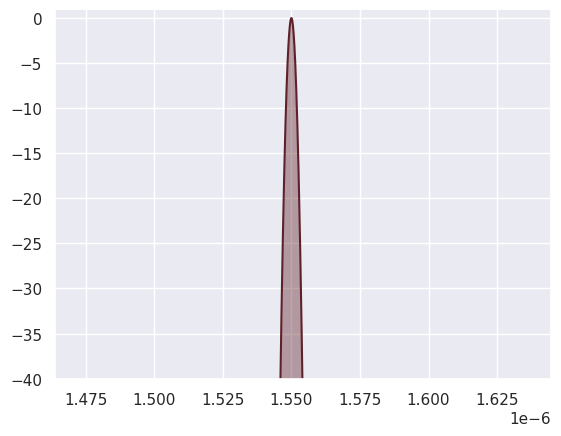

In [5]:
x_row = 2*np.pi*GeSbS_Obj.c/(GeSbS_Obj.w_vector+2*np.pi*GeSbS_Obj.c/GeSbS_Obj.lambda_0)

GeSbS_Graphics(dpi=100).dB(x_row, y_limit = [-40,1], y_input = Gaussian_beam)

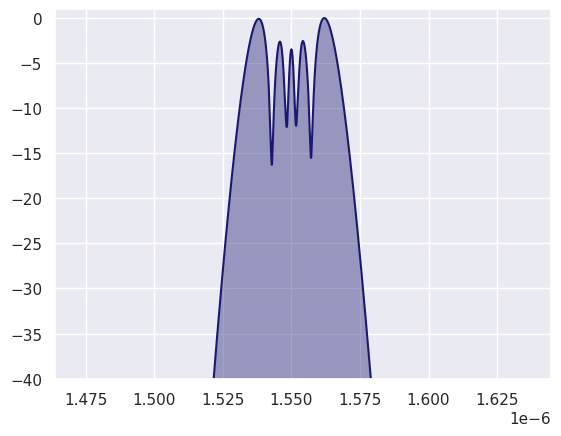

In [6]:
GeSbS_Graphics(dpi=100).dB(x_row, y_limit = [-40,1], y_output = Output)

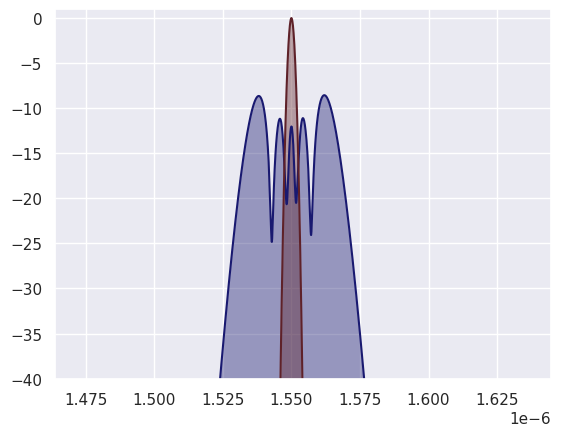

In [7]:
GeSbS_Graphics(dpi=100).dB(x_row, y_limit = [-40,1], y_output = Output, y_input = Gaussian_beam)